In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.cm as cm 
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
import sys

fname = 'cep_225/Ne.1.0.8.SPECTRUM/Ne.1.0.8_00000030.ang_spec'

with open(fname, "r") as fp:
    fp.readline()
    num_krad = int(fp.readline().strip("\n"))
    num_kang = int(fp.readline().strip("\n"))
    
data = pd.read_csv(fname, comment="#", delim_whitespace=True, header=None, skiprows=3)
wang = pd.read_csv("../../wang.txt",comment="#",delim_whitespace=True, header=None, skiprows=1)
wang
krad = data.iloc[:,0]
kang = data.iloc[:,1]
kval = data.iloc[:,2]
# weight = np.reshape(wang.iloc[:,2], (num_kang, 1))
weight=wang.iloc[:,2]
krad = krad.values.reshape([num_krad,num_kang])
kang = kang.values.reshape([num_krad, num_kang])
kval = kval.values.reshape([num_krad, num_kang])


X1= (krad * krad * 27.2 * 0.5) * np.cos(kang)
X2 = (krad * krad * 27.2 * 0.5) * np.sin(kang)
erad= krad * krad * 27.2 * 0.5
prob = krad* krad* abs(kval) / (krad)




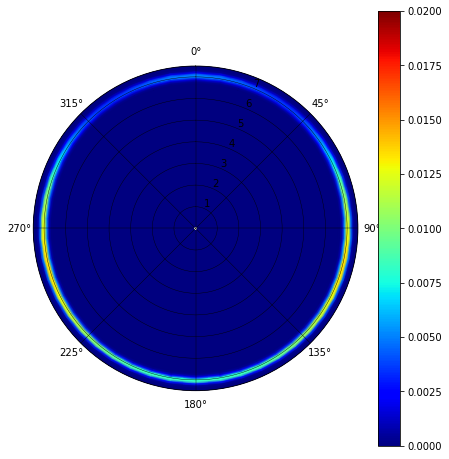

In [15]:
cmap = cm.jet
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121, projection='polar')
ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)     

cmin = 0
cmax = 0.02

im3 = ax1.pcolormesh(kang, erad, prob, cmap=cmap,  shading='gouraud', rasterized=True)
im3.set_clim(cmin,cmax)
im4 = ax1.pcolormesh(-kang, erad, prob, cmap=cmap,  shading='gouraud', rasterized=True)
im4.set_clim(cmin, cmax)

# ax1.axis("image")
plt.colorbar(im3, ax=ax1)
plt.grid(lw=0.4, color="black", linestyle="-")

ax1.set_rmin(0)
ax1.set_rmax(7.5)
# ax1.set_title("Angular distribution of energy spectrum (linear scale) \n\n")

# ###############################################################
# ax2 = fig.add_subplot(122, projection='polar')
# ax2.set_theta_zero_location('N')
# ax2.set_theta_direction(-1)

# cmin = 10**(-8.0)
# cmax = 10**(10.0)

# im = ax2.pcolormesh(kang, erad, prob, cmap=cmap, norm=LogNorm(), shading='gouraud', rasterized=True)
# im.set_clim(cmin,cmax)
# im2 = ax2.pcolormesh(-kang, erad, prob, cmap=cmap, norm=LogNorm(), shading='gouraud', rasterized=True)
# im2.set_clim(cmin, cmax)

# ax2.axis("image")
# # cax2 = fig.add_axes([0.92, 0.1, 0.015, 0.8])   
# cb2 = plt.colorbar(im, cax2, ax=ax2)
# #plt.colorbar(im, ax=ax2)

# cb2.set_label("yield (arb. units)", size=16)
# cb2.ax.tick_params(labelsize=14)
# ax2.tick_params(labelsize=14)

# #ax2.set_xticklabels(["a", "b"])
# ax2.grid(lw=0.4, color="black", linestyle="-")
# #ax2.set_yticklabels(["50 eV", "100 eV", "150 eV", "200 eV"])



# ax2.set_rmin(0)
# ax2.set_rmax(40)
# ax2.set_title("angular distribution of energy spectrum (log scale) \n\n ")

# if(0):
#     cmin = -15
#     cmax = -4
#     im = ax.pcolormesh(kang, erad, np.log(prob), cmap=cmap)
#     im.set_clim(cmin,cmax)
#     im2 = ax.pcolormesh(-kang, erad, np.log(prob), cmap=cmap)
#     im2.set_clim(cmin, cmax)

# plt.colorbar(im2)
# plt.axis('equal')
plt.savefig('pad_linear_cep_225.png', dpi=300)
plt.show()